In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlflow
from mlflow.models import infer_signature
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline

In [2]:
# Loading Train, Validation, and Test Data
msg_train = pd.read_csv('./data/train.csv')
msg_val = pd.read_csv('./data/validation.csv')
msg_test = pd.read_csv('./data/test.csv')

In [3]:
# Preprocessing Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [4]:
# Fit the pipeline on training data
pipeline.fit(msg_train['message'])

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer())])

In [5]:
# Prepare train, validation, and test data
X_train = pipeline.transform(msg_train['message'])
X_val = pipeline.transform(msg_val['message'])
X_test = pipeline.transform(msg_test['message'])
y_train = msg_train['label']
y_val = msg_val['label']
y_test = msg_test['label']

In [6]:
# Function to print AUCPR and plot Precision-Recall curve
def print_aucpr(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auc_pr = auc(recall, precision)
    print(f"The AUCPR is = {auc_pr}")
    plt.figure(figsize=(5, 5))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

In [7]:
def pr_auc(y_true, y_pred):
    p, r, _ = precision_recall_curve(y_true, y_pred, pos_label=1)
    return auc(r, p)

In [8]:
# Model Selection
df = pd.DataFrame(np.zeros((3, 1)), index=["Naive Bayes", "Logistic Regression", "Support Vector Machines"], columns=["AUC-PR"])

In [10]:
mlflow.set_experiment("my_experiment")

2025/03/04 23:30:49 INFO mlflow.tracking.fluent: Experiment with name 'my_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/Nirjhar%20Nath/OneDrive/Desktop/AML2025-Assignment2/mlruns/543558585617649612', creation_time=1741111249376, experiment_id='543558585617649612', last_update_time=1741111249376, lifecycle_stage='active', name='my_experiment', tags={}>

In [11]:
mlflow.search_experiments()

[<Experiment: artifact_location='file:///C:/Users/Nirjhar%20Nath/OneDrive/Desktop/AML2025-Assignment2/mlruns/543558585617649612', creation_time=1741111249376, experiment_id='543558585617649612', last_update_time=1741111249376, lifecycle_stage='active', name='my_experiment', tags={}>]

In [12]:
mlflow.set_tracking_uri("file:///C:/Users/Nirjhar Nath/OneDrive/Desktop/AML2025-Assignment2/mlruns")

In [13]:
# Naive Bayes Classifier
with mlflow.start_run():
    model = MultinomialNB(alpha=0.05)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    signature = infer_signature(X_val, y_val)
    
    mlflow.log_params({"alpha": 0.05})
    mlflow.log_param("model_name", "Multinomial NB Model")
    mlflow.log_metrics({"AUC-PR": pr_auc(y_val, y_pred), "Accuracy": accuracy_score(y_val, y_pred), "F1-Score": f1_score(y_val, y_pred)})
    mlflow.sklearn.log_model(model, artifact_path="sklearn-model", signature=signature, registered_model_name="Multinomial NB Model")

C:\Users\Nirjhar Nath\anaconda3\New folder\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Multinomial NB Model'.
Created version '1' of model 'Multinomial NB Model'.


In [14]:
# Logistic Regression
with mlflow.start_run():
    model = LogisticRegression(C=50, class_weight="balanced")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    signature = infer_signature(X_val, y_val)
    
    mlflow.log_params({"C": 50, "class_weight": "balanced"})
    mlflow.log_param("model_name", "Logistic Regression Model")
    mlflow.log_metrics({"AUC-PR": pr_auc(y_val, y_pred), "Accuracy": accuracy_score(y_val, y_pred), "F1-Score": f1_score(y_val, y_pred)})
    mlflow.sklearn.log_model(model, artifact_path="sklearn-model", signature=signature, registered_model_name="Logistic Regression Model")

C:\Users\Nirjhar Nath\anaconda3\New folder\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Logistic Regression Model'.
Created version '1' of model 'Logistic Regression Model'.


In [15]:
# Support Vector Machines
with mlflow.start_run():
    model = SVC(C=5, gamma="scale", kernel="linear")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    signature = infer_signature(X_val, y_val)
    
    mlflow.log_params({"C": 5, "gamma": "scale", "kernel": "linear"})
    mlflow.log_param("model_name", "Support Vector Machines Model")
    mlflow.log_metrics({"AUC-PR": pr_auc(y_val, y_pred), "Accuracy": accuracy_score(y_val, y_pred), "F1-Score": f1_score(y_val, y_pred)})
    mlflow.sklearn.log_model(model, artifact_path="sklearn-model", signature=signature, registered_model_name="Support Vector Machines Model")

C:\Users\Nirjhar Nath\anaconda3\New folder\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Support Vector Machines Model'.
Created version '1' of model 'Support Vector Machines Model'.


In [18]:
# Get all runs from the default experiment
runs_df = mlflow.search_runs()

# Print available run IDs
print(runs_df["run_id"])

0    93b1ce01dfef4edf8f2befbf2b5ad2a9
1    5703c78d9bb04b1bae633159b56720c4
2    d9b44f81b2a740dc882d1d22601278b6
Name: run_id, dtype: object


The AUCPR is = 0.959411297059854


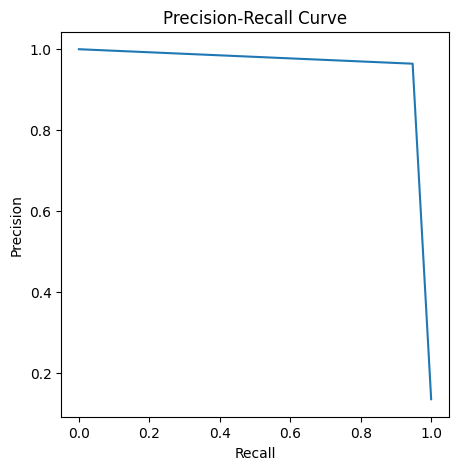

In [19]:
# Load and Evaluate the Best Model
best_model_path = "runs:/93b1ce01dfef4edf8f2befbf2b5ad2a9/sklearn-model"
model = mlflow.pyfunc.load_model(best_model_path)
y_pred = model.predict(X_test)
print_aucpr(y_test, y_pred)
df.loc['Naive Bayes', 'AUC-PR'] = pr_auc(y_test, y_pred)

The AUCPR is = 0.9509526504433125


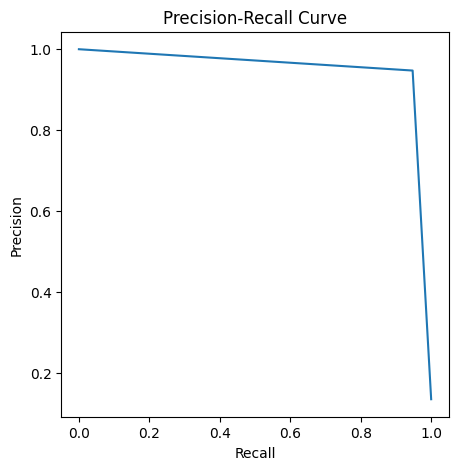

In [24]:
# Load and Evaluate the Best Model
best_model_path = "runs:/5703c78d9bb04b1bae633159b56720c4/sklearn-model"
model = mlflow.pyfunc.load_model(best_model_path)
y_pred = model.predict(X_test)
print_aucpr(y_test, y_pred)
df.loc['Logistic Regression', 'AUC-PR'] = pr_auc(y_test, y_pred)

The AUCPR is = 0.9696912532226624


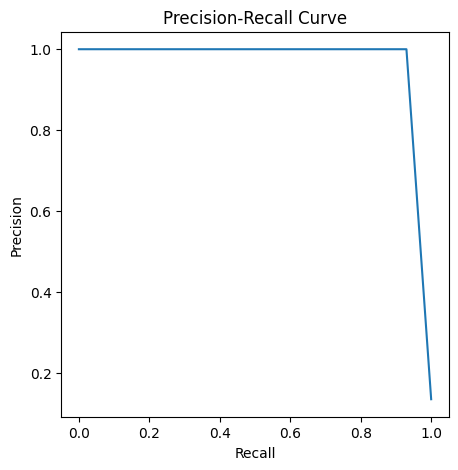

In [25]:
# Load and Evaluate the Best Model
best_model_path = "runs:/d9b44f81b2a740dc882d1d22601278b6/sklearn-model"
model = mlflow.pyfunc.load_model(best_model_path)
y_pred = model.predict(X_test)
print_aucpr(y_test, y_pred)
df.loc['Support Vector Machines', 'AUC-PR'] = pr_auc(y_test, y_pred)

In [27]:
print("Best Model based on AUC-PR:")
print(df)

Best Model based on AUC-PR:
                           AUC-PR
Naive Bayes              0.959411
Logistic Regression      0.950953
Support Vector Machines  0.969691


It turns out that Support Vector Machines model has the highest AUC-PR value. Therefore, we choose to select the SVM model as the best choice for spam/ham classification.